### GENERAL

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sqlite3

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
db_path = r'C:\PI\Proyecto Final\travel.sqlite'

In [6]:
# Conectar a la base de datos SQLite
conexion = sqlite3.connect(db_path)

In [7]:
# Crear un cursor para ejecutar consultas SQL
cursor = conexion.cursor()

# Ejecutar una consulta para ver las tablas disponibles
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tablas = cursor.fetchall()
print("Tablas disponibles:", tablas)


Tablas disponibles: [('aircrafts_data',), ('airports_data',), ('boarding_passes',), ('bookings',), ('flights',), ('seats',), ('ticket_flights',), ('tickets',)]


### ANALISIS DE TABLAS

#### 1-BOOKINGS

In [51]:
# Cargar una tabla específica en un DataFrame de pandas
# Suponiendo que la tabla se llama 'mi_tabla'
df_bookings = pd.read_sql_query("SELECT * FROM bookings", conexion)

# Mostrar las primeras filas de la tabla cargada
print(df_bookings.head())




  book_ref               book_date  total_amount
0   00000F  2017-07-05 03:12:00+03        265700
1   000012  2017-07-14 09:02:00+03         37900
2   000068  2017-08-15 14:27:00+03         18100
3   000181  2017-08-10 13:28:00+03        131800
4   0002D8  2017-08-07 21:40:00+03         23600


In [9]:
df_bookings.shape

(262788, 3)

In [11]:
df_bookings['book_ref'].nunique()

262788

In [13]:
# Configurar pandas para evitar la notación científica

pd.set_option('display.float_format', '{:,.2f}'.format)


In [14]:
df_bookings.columns

Index(['book_ref', 'book_date', 'total_amount'], dtype='object')

In [15]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262788 entries, 0 to 262787
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   book_ref      262788 non-null  object
 1   book_date     262788 non-null  object
 2   total_amount  262788 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.0+ MB


In [16]:
df_bookings.describe()

,total_amount
count,"262,788.00"
mean,"79,025.61"
std,"77,621.92"
min,"3,400.00"
25%,"29,000.00"
50%,"55,900.00"
75%,"99,200.00"
max,"1,204,500.00"


In [19]:
for columna in df_bookings.columns:
    if df_bookings[columna].dtype== 'float64' or df_bookings[columna].dtype== 'int64':
        print(columna)
        print (f'Prom {df_bookings[columna].mean()}')
        print (f'mediana {df_bookings[columna].median()}')
        print (f'var {df_bookings[columna].var()}')
        print (f'std {df_bookings[columna].std()}')
        print (f'max {df_bookings[columna].max()}')
        print (f'min {df_bookings[columna].min()}')
        print (f'rango {df_bookings[columna].max()-df_bookings[columna].min()}')
        print('--------')
           

total_amount
Prom 79025.60581152869
mediana 55900.0
var 6025162887.247295
std 77621.92272320556
max 1204500
min 3400
rango 1201100
--------


Analisis de nulos


In [40]:
df_bookings.isnull().sum()

book_ref        0
book_date       0
total_amount    0
dtype: int64

In [37]:
df_bookings_nulos =df_bookings.isnull().sum() [df_bookings.isnull().sum()>0]
print(df_bookings_nulos)

Series([], dtype: int64)


In [40]:
for columna in df_bookings.columns:
    if df_bookings[columna].nunique() == df_bookings.shape[0]:
        print (f'{columna} es unica' )

book_ref es unica


In [14]:
df_bookings.to_csv('Bookings.csv', index= False)

In [33]:
# Obtener las claves foráneas de una tabla específica
tabla = 'bookings'  
consulta = f"PRAGMA foreign_key_list({tabla})"

# Ejecutar la consulta
cursor = conexion.cursor()
cursor.execute(consulta)

# Mostrar los resultados
claves_foraneas = cursor.fetchall()
for clave in claves_foraneas:
    print(clave)

Analisis de Outliers

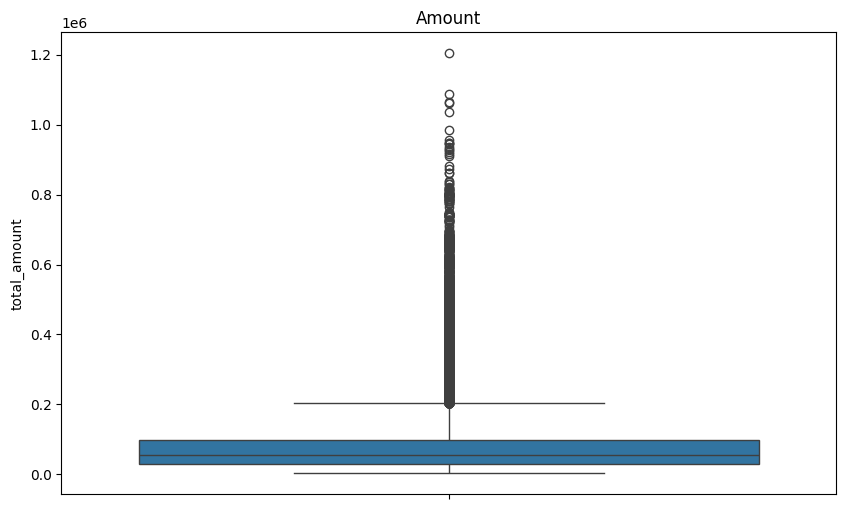

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_bookings,y='total_amount')
plt.title('Amount')
plt.show()


In [50]:
# para identificar outliers
# Calcular la media y desviación estándar
mean = np.mean(df_bookings['total_amount'])
std = np.std(df_bookings['total_amount'])

# Calcular el Z-Score manualmente
df_bookings['zscore'] = (df_bookings['total_amount'] - mean) / std

# Filtrar los outliers (usando un umbral de 3 para el Z-Score)
outliers = df_bookings[df_bookings['zscore'].abs() > 3]

print(outliers.shape)
print(outliers['total_amount'].describe())
print(outliers)

(5141, 4)
count       5,141.00
mean      428,091.34
std        96,236.15
min       311,900.00
25%       369,000.00
50%       398,600.00
75%       476,000.00
max     1,204,500.00
Name: total_amount, dtype: float64
       book_ref               book_date  total_amount  zscore
86       00138A  2017-07-04 12:52:00+03        372500    3.78
93       001628  2017-07-15 10:59:00+03        813300    9.46
132      001FF3  2017-07-23 22:34:00+03        542200    5.97
164      0029D3  2017-08-07 16:12:00+03        397300    4.10
178      002E3A  2017-07-29 02:10:00+03        393000    4.04
...         ...                     ...           ...     ...
262511   FFBB15  2017-07-19 13:39:00+03        443000    4.69
262539   FFC1E6  2017-08-03 23:34:00+03        432500    4.55
262641   FFDA56  2017-08-14 07:12:00+03        386300    3.96
262720   FFEFA8  2017-08-05 11:39:00+03        408500    4.24
262748   FFF637  2017-07-28 04:46:00+03        396500    4.09

[5141 rows x 4 columns]


In [42]:
not_outliers = df_bookings[df_bookings['zscore'].abs() <= 3]

print(not_outliers.shape)
print(not_outliers['total_amount'].describe())

print(not_outliers)

(257647, 4)
count   257,647.00
mean     72,060.47
std      58,998.39
min       3,400.00
25%      28,800.00
50%      55,800.00
75%      94,200.00
max     311,700.00
Name: total_amount, dtype: float64
       book_ref               book_date  total_amount  zscore
0        00000F  2017-07-05 03:12:00+03        265700    2.40
1        000012  2017-07-14 09:02:00+03         37900   -0.53
2        000068  2017-08-15 14:27:00+03         18100   -0.78
3        000181  2017-08-10 13:28:00+03        131800    0.68
4        0002D8  2017-08-07 21:40:00+03         23600   -0.71
...         ...                     ...           ...     ...
262783   FFFEF3  2017-07-17 07:23:00+03         56000   -0.30
262784   FFFF2C  2017-08-08 05:55:00+03         10800   -0.88
262785   FFFF43  2017-07-20 20:42:00+03         78500   -0.01
262786   FFFFA8  2017-08-08 04:45:00+03         28800   -0.65
262787   FFFFF7  2017-07-01 22:12:00+03         73600   -0.07

[257647 rows x 4 columns]


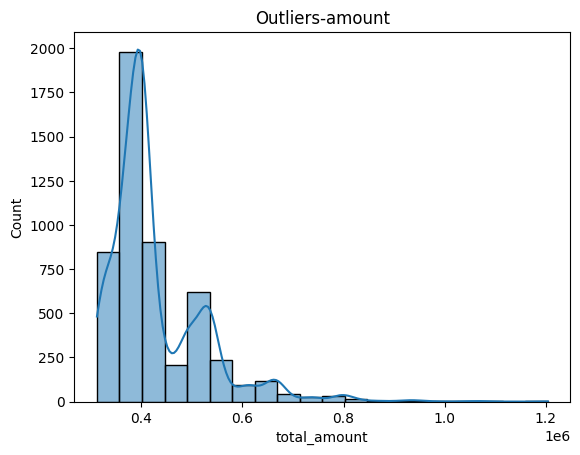

In [53]:
sns.histplot(data=outliers,x='total_amount',bins =20, kde=True)
plt.title('Outliers-amount')
plt.show()

In [24]:
query_bookings_tickets= '''
SELECT 
    b.book_ref,
    b.total_amount,
    COUNT(t.book_ref) AS cantidad_tickets
FROM
    bookings as b
LEFT JOIN tickets t ON b.book_ref = t.book_ref
ORDER BY    
    cantidad_tickets
'''
df_bookings_tickets = pd.read_sql_query(query_bookings_tickets, conexion)

# Mostrar las primeras filas de la tabla cargada
print(df_bookings_tickets)

  book_ref  total_amount  cantidad_tickets
0   00000F        265700            366733


In [31]:
df_bookings_max = pd.read_sql_query("SELECT * FROM bookings WHERE total_amount == 1204500", conexion)
print(df_bookings_max)

  book_ref               book_date  total_amount
0   3B54BB  2017-07-05 17:08:00+03       1204500


Analisis de duplicados

In [11]:
conteo_duplicados = df_bookings.duplicated().sum()
print(conteo_duplicados)


0


#### 2-TICKETS

In [8]:
# Cargar una tabla específica en un DataFrame de pandas
# Suponiendo que la tabla se llama 'mi_tabla'
df_tickets= pd.read_sql_query("SELECT * FROM tickets", conexion)

# Mostrar las primeras filas de la tabla cargada
print(df_tickets.head())

       ticket_no book_ref passenger_id
0  0005432000987   06B046  8149 604011
1  0005432000988   06B046  8499 420203
2  0005432000989   E170C3  1011 752484
3  0005432000990   E170C3  4849 400049
4  0005432000991   F313DD  6615 976589


In [27]:
df_tickets_0000F= pd.read_sql_query("SELECT * FROM tickets WHERE book_ref == '00000F' ", conexion)
print(df_tickets_0000F)

       ticket_no book_ref passenger_id
0  0005435838975   00000F  1708 262537


In [32]:
df_tickets_3B54BB= pd.read_sql_query("SELECT * FROM tickets WHERE book_ref == '3B54BB' ", conexion)
print(df_tickets_3B54BB)

       ticket_no book_ref passenger_id
0  0005432537033   3B54BB  5368 241076
1  0005432537034   3B54BB  9994 168772
2  0005432537035   3B54BB  1406 902284


In [55]:
df_tickets.shape

(366733, 3)

In [19]:
df_tickets.columns

Index(['ticket_no', 'book_ref', 'passenger_id'], dtype='object')

In [34]:
for columna in df_tickets.columns:
    if df_tickets[columna].nunique() == df_tickets.shape[0]:
        print (f'{columna} es unica' )

ticket_no es unica
passenger_id es unica


Analisis de Nulos

In [36]:
df_tickets_nulos =df_tickets.isnull().sum() [df_tickets.isnull().sum()>0]
print(df_tickets_nulos)

Series([], dtype: int64)


In [17]:
df_tickets.to_csv('tickets.csv', index= False)

Para ver las claves

In [37]:
 
tabla2 = 'tickets'  
consulta2 = f"PRAGMA foreign_key_list({tabla2})"

# Ejecutar la consulta
cursor = conexion.cursor()
cursor.execute(consulta2)

# Mostrar los resultados
claves_foraneas2 = cursor.fetchall()
for clave in claves_foraneas2:
    print(clave)

Analisis de duplicados

In [13]:
conteo_duplicados = df_tickets.duplicated().sum()
print(conteo_duplicados)

0


#### 3-FLIGHTS

In [9]:
 
df_flights= pd.read_sql_query("SELECT * FROM flights", conexion)

print(df_flights.head())

   flight_id flight_no     scheduled_departure       scheduled_arrival  \
0       1185    PG0134  2017-09-10 09:50:00+03  2017-09-10 14:55:00+03   
1       3979    PG0052  2017-08-25 14:50:00+03  2017-08-25 17:35:00+03   
2       4739    PG0561  2017-09-05 12:30:00+03  2017-09-05 14:15:00+03   
3       5502    PG0529  2017-09-12 09:50:00+03  2017-09-12 11:20:00+03   
4       6938    PG0461  2017-09-04 12:25:00+03  2017-09-04 13:20:00+03   

  departure_airport arrival_airport     status aircraft_code actual_departure  \
0               DME             BTK  Scheduled           319               \N   
1               VKO             HMA  Scheduled           CR2               \N   
2               VKO             AER  Scheduled           763               \N   
3               SVO             UFA  Scheduled           763               \N   
4               SVO             ULV  Scheduled           SU9               \N   

  actual_arrival  
0             \N  
1             \N  
2          

In [18]:
df_flights.shape

(33121, 10)

In [12]:
df_flights.columns

Index(['flight_id', 'flight_no', 'scheduled_departure', 'scheduled_arrival',
       'departure_airport', 'arrival_airport', 'status', 'aircraft_code',
       'actual_departure', 'actual_arrival'],
      dtype='object')

In [38]:
for columna in df_flights.columns:
    if df_flights[columna].nunique() == df_flights.shape[0]:
        print (f'{columna} es unica' )

flight_id es unica


Analisis de nulos

In [39]:
df_flights_nulos =df_flights.isnull().sum() [df_flights.isnull().sum()>0]
print(df_flights_nulos)

Series([], dtype: int64)


In [19]:
df_flights.to_csv('flights.csv', index= False)

In [12]:
df_flights['actual_departure'].dtype

dtype('O')

Cantidad de registros con actual_departure y actual_arrival en N

In [29]:
flights_datosN=df_flights[df_flights['actual_departure']==r'\N']['flight_id'].count()
print(flights_datosN)

registros_total = df_flights['flight_id'].count()

print(f'% de registros en N {flights_datosN/registros_total *100}%')


16348
% de registros en N 49.358413091392165%


In [22]:
df_flights.shape


(33121, 10)

Analisis de duplicados

In [20]:
conteo_duplicados = df_tickets.duplicated().sum()
print(conteo_duplicados)

0


#### 4-TICKETS_FLIGHTS

In [16]:
df_tickets_flights= pd.read_sql_query("SELECT * FROM ticket_flights", conexion)

print(df_tickets_flights.head())

       ticket_no  flight_id fare_conditions  amount
0  0005432159776      30625        Business   42100
1  0005435212351      30625        Business   42100
2  0005435212386      30625        Business   42100
3  0005435212381      30625        Business   42100
4  0005432211370      30625        Business   42100


In [50]:
df_tickets_flights.shape

(1045726, 4)

In [66]:
df_tickets_flights.columns

Index(['ticket_no', 'flight_id', 'fare_conditions', 'amount'], dtype='object')

In [46]:
df_tickets_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045726 entries, 0 to 1045725
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   ticket_no        1045726 non-null  object
 1   flight_id        1045726 non-null  int64 
 2   fare_conditions  1045726 non-null  object
 3   amount           1045726 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 31.9+ MB


In [48]:
df_tickets_flights['amount'].describe()

count   1,045,726.00
mean       19,858.91
std        22,612.39
min         3,000.00
25%         7,200.00
50%        13,400.00
75%        23,100.00
max       203,300.00
Name: amount, dtype: float64

In [61]:
for columna in df_tickets_flights.columns:
    print(columna)
    print(df_tickets_flights[columna].describe())
    print ('------' )

ticket_no
count           1045726
unique           366733
top       0005432665242
freq                  6
Name: ticket_no, dtype: object
------
flight_id
count   1,045,726.00
mean       14,110.06
std         9,732.94
min             1.00
25%         5,501.00
50%        11,926.00
75%        23,039.00
max        33,121.00
Name: flight_id, dtype: float64
------
fare_conditions
count     1045726
unique          3
top       Economy
freq       920793
Name: fare_conditions, dtype: object
------
amount
count   1,045,726.00
mean       19,858.91
std        22,612.39
min         3,000.00
25%         7,200.00
50%        13,400.00
75%        23,100.00
max       203,300.00
Name: amount, dtype: float64
------


In [62]:
for columna in df_tickets_flights.columns:
    print(columna)
    print(df_tickets_flights[columna].nunique())
    print(df_tickets_flights.shape)
    if df_tickets_flights[columna].nunique() == df_tickets_flights.shape[0]:
        print (f'{columna} es unica' )

ticket_no
366733
(1045726, 4)
flight_id
22226
(1045726, 4)
fare_conditions
3
(1045726, 4)
amount
338
(1045726, 4)


In [67]:
print(df_tickets_flights['amount'].sum())

20766980900


In [68]:
print(df_bookings['total_amount'].sum())

20766980900


In [63]:
df_tickets_flights.groupby('fare_conditions')['amount'].count()

fare_conditions
Business    107642
Comfort      17291
Economy     920793
Name: amount, dtype: int64

In [64]:
df_fareconditions = df_tickets_flights.groupby('fare_conditions')['amount']

In [25]:
print(df_fareconditions)

In [65]:
df_tickets_flights.pivot_table(columns='fare_conditions', 
                                aggfunc={'amount':[np.mean,np.max,np.min,np.size]})

C:\Users\PC\AppData\Local\Temp\ipykernel_11764\1779466692.py:1: FutureWarning: The provided callable <function mean at 0x0000016553012B60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_tickets_flights.pivot_table(columns='fare_conditions',
C:\Users\PC\AppData\Local\Temp\ipykernel_11764\1779466692.py:1: FutureWarning: The provided callable <function max at 0x0000016553012160> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_tickets_flights.pivot_table(columns='fare_conditions',
C:\Users\PC\AppData\Local\Temp\ipykernel_11764\1779466692.py:1: FutureWarning: The provided callable <function min at 0x00000165530122A0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep c

fare_conditions   Business   Comfort    Economy
amount max      203,300.00 47,600.00  74,500.00
       mean      51,143.42 32,740.55  15,959.81
       min        9,100.00 19,900.00   3,000.00
       size     107,642.00 17,291.00 920,793.00

Analisis de Nulos

In [32]:
df_tickets_flights_nulos =df_tickets_flights.isnull().sum() [df_tickets_flights.isnull().sum()>0]
print(df_tickets_flights_nulos)

Series([], dtype: int64)


Analisis de duplicados

In [17]:
conteo_duplicados = df_tickets_flights.duplicated().sum()
print(conteo_duplicados)

0


#### 5-BOARDING_PASSES

In [13]:
df_boarding_passes= pd.read_sql_query("SELECT * FROM boarding_passes", conexion)

print(df_boarding_passes.head())

       ticket_no  flight_id  boarding_no seat_no
0  0005435212351      30625            1      2D
1  0005435212386      30625            2      3G
2  0005435212381      30625            3      4H
3  0005432211370      30625            4      5D
4  0005435212357      30625            5     11A


In [30]:
df_boarding_passes.shape

(579686, 4)

In [58]:
df_boarding_passes.columns

Index(['ticket_no', 'flight_id', 'boarding_no', 'seat_no'], dtype='object')

In [31]:
for columna in df_boarding_passes.columns:
    print(columna)
    print(df_boarding_passes[columna].describe())
    print ('------' )

ticket_no
count            579686
unique           238834
top       0005432692645
freq                  6
Name: ticket_no, dtype: object
------
flight_id
count    579686.000000
mean      13720.816521
std        9713.921174
min           1.000000
25%        5351.000000
50%       11217.000000
75%       22481.000000
max       33120.000000
Name: flight_id, dtype: float64
------
boarding_no
count    579686.000000
mean         54.971529
std          58.819012
min           1.000000
25%          15.000000
50%          36.000000
75%          72.000000
max         374.000000
Name: boarding_no, dtype: float64
------
seat_no
count     579686
unique       461
top           1A
freq        5951
Name: seat_no, dtype: object
------


In [29]:
# detectar columnas con registros unicos

for columna in df_boarding_passes.columns:
    print(columna)
    print(df_boarding_passes[columna].nunique())
    print(df_boarding_passes.shape)
    if df_boarding_passes[columna].nunique() == df_boarding_passes.shape[0]:
        print (f'{columna} es unica' )

ticket_no
238834
(579686, 4)
flight_id
11518
(579686, 4)
boarding_no
374
(579686, 4)
seat_no
461
(579686, 4)


Analisis de Nulos

In [33]:
df_boarding_passes_nulos =df_boarding_passes.isnull().sum() [df_boarding_passes.isnull().sum()>0]
print(df_boarding_passes_nulos)

Series([], dtype: int64)


In [21]:
boarding_passes_group =df_boarding_passes.groupby('boarding_no').count()
print(boarding_passes_group)

             ticket_no  flight_id  seat_no
boarding_no                               
1                11518      11518    11518
2                11399      11399    11399
3                11165      11165    11165
4                10906      10906    10906
5                10609      10609    10609
...                ...        ...      ...
370                  1          1        1
371                  1          1        1
372                  1          1        1
373                  1          1        1
374                  1          1        1

[374 rows x 3 columns]


Analisis de composición del boarding_pass

In [33]:
# Analisi campo boarding_no

df_boardings_repetidos = df_boarding_passes.pivot_table(index='boarding_no', 
                                aggfunc={'ticket_no':np.size})
df_boarding_passes_mayor10 =df_boardings_repetidos[df_boardings_repetidos['ticket_no']>10]
print(df_boarding_passes_mayor10)


             ticket_no
boarding_no           
1                11518
2                11399
3                11165
4                10906
5                10609
...                ...
342                 29
343                 27
344                 23
345                 17
346                 15

[346 rows x 1 columns]


In [46]:
#MIro un caso particular de boarding_pass para analizar por qué repetido
boarding342 =df_boarding_passes[df_boarding_passes['boarding_no'] == 342]
print(boarding342)


            ticket_no  flight_id  boarding_no seat_no
171827  0005435212759       7737          342     50K
192225  0005433233431        259          342     50F
193199  0005434344094       5312          342     51G
213888  0005433233355        282          342     49F
214867  0005434244780       5356          342     51D
236090  0005433131681        305          342     48A
237441  0005435612561      10916          342     51G
257917  0005433113534       9821          342     50H
279664  0005433233807        250          342     49A
295267  0005432527263      30582          342     51D
345036  0005433180937        268          342     49C
346061  0005434244776       5328          342     50H
367030  0005433234028        298          342     50H
367374  0005433181199       9831          342     51E
368040  0005435614145       5360          342     50G
390492  0005435490247       5307          342     50D
411247  0005434726241        276          342     49G
411602  0005434725388       

In [63]:
#miro que en esta caso particular , todos los registros de sus colimnas sean unicos

print(boarding342.shape)
print(boarding342['ticket_no'].nunique())
print(boarding342['flight_id'].nunique())

# son unicos

(29, 4)
29
29


In [56]:
print(df_boarding_passes.dtypes)


ticket_no      object
flight_id       int64
boarding_no     int64
seat_no        object
dtype: object


In [60]:
# miro para un caso particular de ticket
df_boarding_passes['ticket_no'] = df_boarding_passes['ticket_no'].str.strip()

TIcket0005435212759=df_boarding_passes[df_boarding_passes['ticket_no'] =='0005435212759']
print(boarding342)


            ticket_no  flight_id  boarding_no seat_no
171827  0005435212759       7737          342     50K
192225  0005433233431        259          342     50F
193199  0005434344094       5312          342     51G
213888  0005433233355        282          342     49F
214867  0005434244780       5356          342     51D
236090  0005433131681        305          342     48A
237441  0005435612561      10916          342     51G
257917  0005433113534       9821          342     50H
279664  0005433233807        250          342     49A
295267  0005432527263      30582          342     51D
345036  0005433180937        268          342     49C
346061  0005434244776       5328          342     50H
367030  0005433234028        298          342     50H
367374  0005433181199       9831          342     51E
368040  0005435614145       5360          342     50G
390492  0005435490247       5307          342     50D
411247  0005434726241        276          342     49G
411602  0005434725388       

Analizo los tickets que tienen mas de 1 boarding_pass

In [71]:
# Ver tickets que tienen mas de un boarding_pass

#Agrupo boarding_pass por tickets
boarding_passes_groupticket =df_boarding_passes.groupby('ticket_no').count().reset_index()
print(boarding_passes_groupticket)

#tickets que si estan repetidos
##ticketsrepetidos = boarding_passes_groupticket[boarding_passes_groupticket.values>1]
#print(ticketsrepetidos)
#print(len(ticketsrepetidos))

            ticket_no  flight_id  boarding_no  seat_no
0       0005432000987          1            1        1
1       0005432000988          1            1        1
2       0005432000989          1            1        1
3       0005432000990          1            1        1
4       0005432000991          1            1        1
...               ...        ...          ...      ...
238829  0005435999480          1            1        1
238830  0005435999481          1            1        1
238831  0005435999482          1            1        1
238832  0005435999483          1            1        1
238833  0005435999484          1            1        1

[238834 rows x 4 columns]


In [75]:
# contar cantidad de boarding_pass y Flights_id de cada boarding_pass

query_byticket = '''
SELECT
    ticket_no,
    COUNT(boarding_no) AS Cantidad_boardingpass,
    COUNT(DISTINCT flight_id) AS Cantidad_vuelos
FROM
    boarding_passes
GROUP BY
    ticket_no
HAVING
    Cantidad_boardingpass>1
ORDER BY 
    Cantidad_boardingpass DESC

'''

#df_boarding_passes_byticket= pd.read_sql_query(query_byticket, conexion)
#print(df_boarding_passes_byticket)


In [73]:
#print(df_boarding_passes_byticket[df_boarding_passes_byticket['Cantidad_boardingpass']==2])

In [76]:
#frecuencias = df_boarding_passes_byticket['Cantidad_boardingpass'].unique()
#print(frecuencias)

In [77]:
#df_grouped =df_boarding_passes_byticket.groupby('Cantidad_boardingpass')['ticket_no'].count().reset_index()
#print(df_grouped)

In [83]:
df_boarding_por_ticket =boarding_passes_groupticket.groupby('boarding_no')['ticket_no'].count().reset_index()
print(df_boarding_por_ticket)


   boarding_no  ticket_no
0            1      49417
1            2     115409
2            3       3298
3            4      67303
4            5         97
5            6       3310


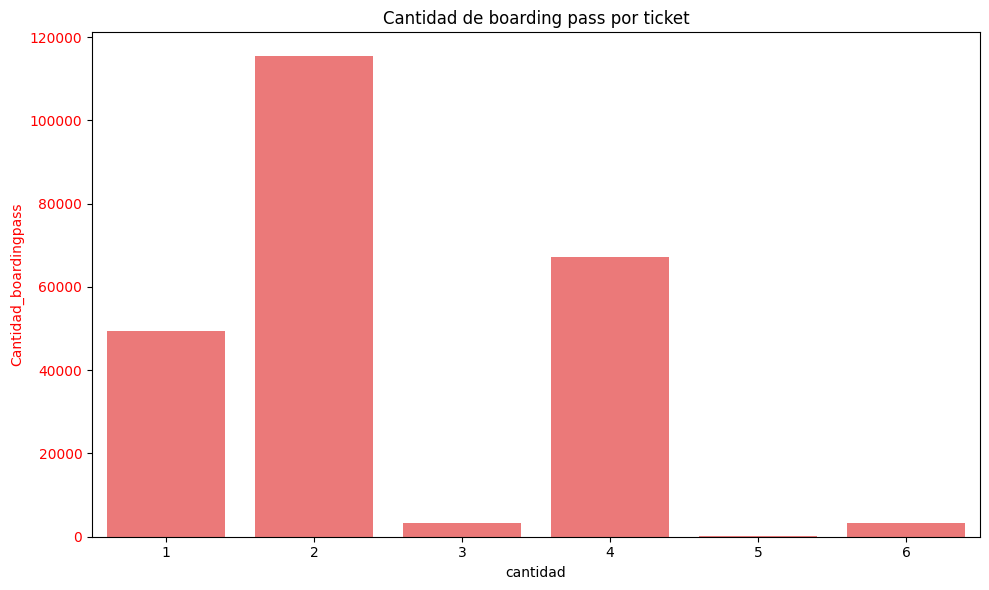

In [91]:
fig, ax1 = plt.subplots(figsize=(10, 6))


sns.barplot(data=df_boarding_por_ticket, x='boarding_no', y='ticket_no' , ax=ax1, color='red', alpha=0.6, dodge = True)
ax1.set_ylabel('Cantidad_boardingpass', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Título del gráfico
plt.title('Cantidad de boarding pass por ticket')
ax1.set_xlabel('cantidad') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Para un mismo ticket hay varios boarding_pass. Hay 189.417 tickets y 579.686 boarding_passes en la tabla de boarding_passes.
Para un mismo numero de boarding_pass hay varios tickets asignados.

Analizo los tickets que tienen mas de 1 flight, a ver si coinciden con los que tienen mas de 1 boarding.

In [85]:
df_flight_por_ticket =boarding_passes_groupticket.groupby('flight_id')['ticket_no'].count().reset_index()
print(df_flight_por_ticket)

   flight_id  ticket_no
0          1      49417
1          2     115409
2          3       3298
3          4      67303
4          5         97
5          6       3310


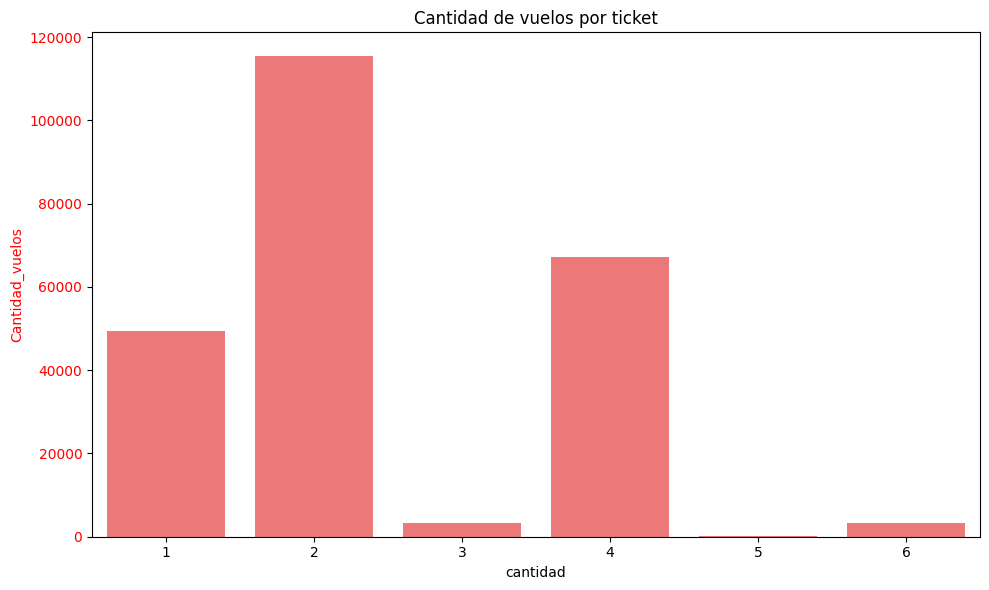

In [87]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(data=df_flight_por_ticket, x='flight_id', y='ticket_no', ax=ax1, color='red', alpha=0.6, dodge = True)
ax1.set_ylabel('Cantidad_vuelos', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Título del gráfico
plt.title('Cantidad de vuelos por ticket')
ax1.set_xlabel('cantidad') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Cantidad de veces que se repite un numero de boarding_pass

In [17]:
query_byboardingno = '''
SELECT
    boarding_no,
    COUNT(ticket_no) AS Cantidad_tickets,
    COUNT(flight_id) AS Cantidad_vuelos
FROM
    boarding_passes
GROUP BY
    boarding_no
ORDER BY 
    Cantidad_tickets
'''

#df_boarding_passes_byboardingno= pd.read_sql_query(query_byboardingno, conexion)
#print(df_boarding_passes_byboardingno)


     boarding_no  Cantidad_tickets  Cantidad_vuelos
0            366                 1                1
1            367                 1                1
2            368                 1                1
3            369                 1                1
4            370                 1                1
..           ...               ...              ...
369            5             10609            10609
370            4             10906            10906
371            3             11165            11165
372            2             11399            11399
373            1             11518            11518

[374 rows x 3 columns]


In [89]:
boarding_passes_group =df_boarding_passes.groupby('boarding_no').count().reset_index()
print(boarding_passes_group)


     boarding_no  ticket_no  flight_id  seat_no
0              1      11518      11518    11518
1              2      11399      11399    11399
2              3      11165      11165    11165
3              4      10906      10906    10906
4              5      10609      10609    10609
..           ...        ...        ...      ...
369          370          1          1        1
370          371          1          1        1
371          372          1          1        1
372          373          1          1        1
373          374          1          1        1

[374 rows x 4 columns]


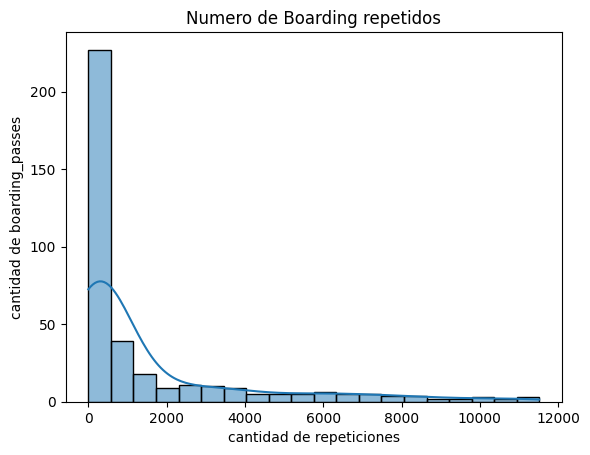

In [90]:
sns.histplot(data=boarding_passes_group,x='ticket_no',bins =20, kde=True)
plt.title('Numero de Boarding repetidos')
plt.xlabel('cantidad de repeticiones')
plt.ylabel('cantidad de boarding_passes')
plt.show()

1 mismo ticket tiene varios boarding_passes porque tiene esa cantidad de flights. 
1 mismo numero de boarding_pass está asociado a distintos tickets.

Analisis de duplicados

In [15]:
conteo_duplicados = df_boarding_passes.duplicated().sum()
print(conteo_duplicados)

0


#### 6-SEATS

In [13]:
df_seats= pd.read_sql_query("SELECT * FROM seats", conexion)

print(df_seats.head())

  aircraft_code seat_no fare_conditions
0           319      2A        Business
1           319      2C        Business
2           319      2D        Business
3           319      2F        Business
4           319      3A        Business


In [36]:
df_seats.shape

(1339, 3)

In [14]:
df_seats.columns

Index(['aircraft_code', 'seat_no', 'fare_conditions'], dtype='object')

In [37]:
for columna in df_seats.columns:
    print(columna)
    print(df_seats[columna].describe())
    print ('------' )

aircraft_code
count     1339
unique       9
top        773
freq       402
Name: aircraft_code, dtype: object
------
seat_no
count     1339
unique     461
top         1A
freq         9
Name: seat_no, dtype: object
------
fare_conditions
count        1339
unique          3
top       Economy
freq         1139
Name: fare_conditions, dtype: object
------


In [38]:
for columna in df_seats.columns:
    print(columna)
    print(df_seats[columna].nunique())
    print(df_seats.shape)
    if df_seats[columna].nunique() == df_seats.shape[0]:
        print (f'{columna} es unica' )

aircraft_code
9
(1339, 3)
seat_no
461
(1339, 3)
fare_conditions
3
(1339, 3)


Analisis de nulos

In [23]:
df_seats_nulos =df_seats.isnull().sum() [df_seats.isnull().sum()>0]
print(df_seats_nulos)

Series([], dtype: int64)


Analisis de duplicados

In [22]:
conteo_duplicados = df_seats.duplicated().sum()
print(conteo_duplicados)

0


#### 7-AIRCRAFTS

In [15]:
df_aircrafts= pd.read_sql_query("SELECT * FROM aircrafts_data", conexion)

print(df_aircrafts.head())

  aircraft_code                                              model  range
0           773    {"en": "Boeing 777-300", "ru": "Боинг 777-300"}  11100
1           763    {"en": "Boeing 767-300", "ru": "Боинг 767-300"}   7900
2           SU9  {"en": "Sukhoi Superjet-100", "ru": "Сухой Суп...   3000
3           320  {"en": "Airbus A320-200", "ru": "Аэробус A320-...   5700
4           321  {"en": "Airbus A321-200", "ru": "Аэробус A321-...   5600


In [41]:
df_aircrafts.shape

(9, 3)

In [16]:
df_aircrafts.columns

Index(['aircraft_code', 'model', 'range'], dtype='object')

In [42]:
for columna in df_aircrafts.columns:
    print(columna)
    print(df_aircrafts[columna].describe())
    print ('------' )

aircraft_code
count       9
unique      9
top       773
freq        1
Name: aircraft_code, dtype: object
------
model
count                                                   9
unique                                                  9
top       {"en": "Boeing 777-300", "ru": "Боинг 777-300"}
freq                                                    1
Name: model, dtype: object
------
range
count        9.000000
mean      5344.444444
std       3013.764718
min       1200.000000
25%       3000.000000
50%       5600.000000
75%       6700.000000
max      11100.000000
Name: range, dtype: float64
------


In [43]:
for columna in df_aircrafts.columns:
    print(columna)
    print(df_aircrafts[columna].nunique())
    print(df_aircrafts.shape)
    if df_aircrafts[columna].nunique() == df_aircrafts.shape[0]:
        print (f'{columna} es unica' )

aircraft_code
9
(9, 3)
aircraft_code es unica
model
9
(9, 3)
model es unica
range
9
(9, 3)
range es unica


Analisis de nulos

In [26]:
df_aircrafts_nulos =df_aircrafts.isnull().sum() [df_aircrafts.isnull().sum()>0]
print(df_aircrafts_nulos)

Series([], dtype: int64)


Analisis de duplicados

In [25]:
conteo_duplicados = df_aircrafts.duplicated().sum()
print(conteo_duplicados)

0


#### 8-AIRPORTS

In [17]:
df_airports= pd.read_sql_query("SELECT * FROM airports_data", conexion)

print(df_airports.head())

  airport_code                                       airport_name  \
0          YKS          {"en": "Yakutsk Airport", "ru": "Якутск"}   
1          MJZ            {"en": "Mirny Airport", "ru": "Мирный"}   
2          KHV  {"en": "Khabarovsk-Novy Airport", "ru": "Хабар...   
3          PKC        {"en": "Yelizovo Airport", "ru": "Елизово"}   
4          UUS  {"en": "Yuzhno-Sakhalinsk Airport", "ru": "Хом...   

                                                city  \
0                  {"en": "Yakutsk", "ru": "Якутск"}   
1                   {"en": "Mirnyj", "ru": "Мирный"}   
2            {"en": "Khabarovsk", "ru": "Хабаровск"}   
3  {"en": "Petropavlovsk", "ru": "Петропавловск-К...   
4  {"en": "Yuzhno-Sakhalinsk", "ru": "Южно-Сахали...   

                                 coordinates          timezone  
0      (129.77099609375,62.0932998657226562)      Asia/Yakutsk  
1    (114.03900146484375,62.534698486328125)      Asia/Yakutsk  
2      (135.18800354004,48.5279998779300001)  Asia/Vl

In [45]:
df_airports.shape

(104, 5)

In [18]:
df_airports.columns

Index(['airport_code', 'airport_name', 'city', 'coordinates', 'timezone'], dtype='object')

In [46]:
for columna in df_airports.columns:
    print(columna)
    print(df_airports[columna].describe())
    print ('------' )

airport_code
count     104
unique    104
top       YKS
freq        1
Name: airport_code, dtype: object
------
airport_name
count                                           104
unique                                          104
top       {"en": "Yakutsk Airport", "ru": "Якутск"}
freq                                              1
Name: airport_name, dtype: object
------
city
count                                  104
unique                                 101
top       {"en": "Moscow", "ru": "Москва"}
freq                                     3
Name: city, dtype: object
------
coordinates
count                                       104
unique                                      104
top       (129.77099609375,62.0932998657226562)
freq                                          1
Name: coordinates, dtype: object
------
timezone
count               104
unique               17
top       Europe/Moscow
freq                 44
Name: timezone, dtype: object
------


In [47]:
for columna in df_airports.columns:
    print(columna)
    print(df_airports[columna].nunique())
    print(df_airports.shape)
    if df_airports[columna].nunique() == df_airports.shape[0]:
        print (f'{columna} es unica' )

airport_code
104
(104, 5)
airport_code es unica
airport_name
104
(104, 5)
airport_name es unica
city
101
(104, 5)
coordinates
104
(104, 5)
coordinates es unica
timezone
17
(104, 5)


Analisis de nulos

In [30]:
df_airports_nulos =df_airports.isnull().sum() [df_airports.isnull().sum()>0]
print(df_airports_nulos)

Series([], dtype: int64)


Analisis de duplicados

In [29]:
conteo_duplicados = df_airports.duplicated().sum()
print(conteo_duplicados)

0


In [ ]:
# Cerrar la conexión
conexion.close()